In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('old_data/mclean-out.csv')
# df = pd.read_csv('safecast_data_and_dists.csv')

In [29]:

# device_id  uSvh=CPM/x      Reciprocal Estimate
# -- =================  ==========     ====================
# --              NULL       350.0       0.0028571428571429
# --5,15,16,17,18,22,69,89   350.0       0.0028571428571429
# --      6,7,11,13,23       100.0                     0.01
# --   4,9,10,12,19,24       132.0       0.0075757575757576
# --                21      1750.0    0.0005714285714285714
# --  21 & user_id=530     11000.0    0.0000909090909090909  *** TEMPORARY ***
def convert_cpm(row):
    """This function is based on the above table taken from safecast's publicly available code to
    convert cpm to uSv/h. MEXT doserates are already in uSv/h"""
    conversion_dict = {
        5: 0.0028571428571429,
        15: 0.0028571428571429,
        16: 0.0028571428571429,
        17: 0.0028571428571429,
        18: 0.0028571428571429,
        22: 0.0028571428571429,
        69: 0.0028571428571429,
        89: 0.0028571428571429,
        6: 0.01,
        7: 0.01,
        11: 0.01,
        13: 0.01,
        23: 0.01,
        4:0.0075757575757576,
        9:0.0075757575757576,
        10:0.0075757575757576,
        12:0.0075757575757576,
        19:0.0075757575757576,
        24:0.0075757575757576,
        21:0.0005714285714285714}
    did = row['Device ID']
    try:
        if pd.isnull(did):
#             print('nan')
            m = 0.0028571428571429
            return row['Value']*m
        else:
            m = conversion_dict[did]
            if row['Unit'] == 'cpm':
                return row['Value']*m
            else:
                raise KeyError
    except KeyError:
#         print('keyerr')
        return np.nan

In [16]:
df['Unit'].value_counts()

cpm             32061449
usv                12226
microsievert         185
dtype: int64

In [12]:
df.head().apply(convert_cpm, axis=1)

0    0.134286
1    0.140000
2    0.140000
3    0.134286
4    0.131429
dtype: float64

In [30]:
drs = df.apply(convert_cpm, axis=1)

In [ ]:
df['doserate'] = drs

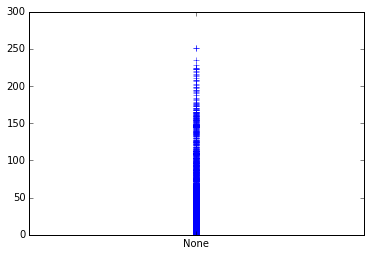

In [35]:
%matplotlib inline
drs.plot(kind='box')

In [ ]:
df[df.]

In [23]:
df['Captured Time'].head()

0    2011-04-23 21:53:03
1    2011-04-23 21:53:08
2    2011-04-23 21:53:13
3    2011-04-23 21:53:28
4    2011-04-23 21:53:33
Name: Captured Time, dtype: object

In [24]:
dates = pd.to_datetime(df['Captured Time'])

In [25]:
len(dates.value_counts())

26420682

In [26]:
dates.describe()

count                32073860
unique               26420682
top       2012-07-17 15:54:19
freq                     2761
first     2011-04-23 21:52:38
last      2015-10-05 06:10:42
Name: Captured Time, dtype: object

In [4]:
# chunks = pd.read_csv('safecast_measurements.csv',chunksize=50000)

In [6]:
chunks = pd.read_csv('original_data/mclean.csv',chunksize=50000)

In [7]:
i = 0
with open('safecast_times.csv', 'w') as f:
    for c in chunks:
        c['Captured Time'].to_csv(f)
        i += 1
        if i % 10 == 0:
            print(i)
        if i == 50:
            break
        

10
20
30
40
50


In [13]:
c.to_json(orient='records')

'[{"ID":15642740,"User ID":1,"Captured Time":"2012-02-21 05:51:49","Latitude":37.6380516667,"Longitude":140.9562733333,"Value":102,"Unit":"cpm","Device ID":null},{"ID":15642741,"User ID":1,"Captured Time":"2012-02-21 05:51:54","Latitude":37.6380516667,"Longitude":140.9562733333,"Value":100,"Unit":"cpm","Device ID":null},{"ID":15642742,"User ID":1,"Captured Time":"2012-02-21 05:51:59","Latitude":37.6380533333,"Longitude":140.9562733333,"Value":102,"Unit":"cpm","Device ID":null},{"ID":15642743,"User ID":1,"Captured Time":"2012-02-21 05:52:04","Latitude":37.6380533333,"Longitude":140.9562733333,"Value":103,"Unit":"cpm","Device ID":null},{"ID":15642744,"User ID":1,"Captured Time":"2012-02-21 05:52:09","Latitude":37.6380533333,"Longitude":140.9562733333,"Value":102,"Unit":"cpm","Device ID":null},{"ID":15642745,"User ID":1,"Captured Time":"2012-02-21 05:52:14","Latitude":37.6380533333,"Longitude":140.9562716667,"Value":111,"Unit":"cpm","Device ID":null},{"ID":15642746,"User ID":1,"Captured T

In [17]:
c['User ID'].value_counts()

1    50000
dtype: int64

In [10]:
c.dtypes

ID                 int64
User ID            int64
Captured Time     object
Latitude         float64
Longitude        float64
Value              int64
Unit              object
Device ID        float64
dtype: object

In [ ]:
['ID', 'User ID', 'Captured Time', 'Latitude', 'Longitude', 'Value',
       'Unit', 'Device ID']

In [11]:
c

ID  User ID        Captured Time   Latitude   Longitude  Value  \
0      15642740        1  2012-02-21 05:51:49  37.638052  140.956273    102   
1      15642741        1  2012-02-21 05:51:54  37.638052  140.956273    100   
2      15642742        1  2012-02-21 05:51:59  37.638053  140.956273    102   
3      15642743        1  2012-02-21 05:52:04  37.638053  140.956273    103   
4      15642744        1  2012-02-21 05:52:09  37.638053  140.956273    102   
5      15642745        1  2012-02-21 05:52:14  37.638053  140.956272    111   
6      15642746        1  2012-02-21 05:52:19  37.638053  140.956272    110   
7      15642747        1  2012-02-21 05:52:24  37.638055  140.956272    108   
8      15642748        1  2012-02-21 05:52:29  37.638055  140.956272    112   
9      15642749        1  2012-02-21 05:52:34  37.638057  140.956272    115   
10     15642750        1  2012-02-21 05:52:40  37.638057  140.956272    118   
11     15642751        1  2012-02-21 05:52:45  37.638058  140.956273    118   
12     15642752        1  2012-02-21 05:52:50  37.638058  140.956273    119   
13     15642753        1  2012-02-21 05:52:55  37.638058  140.956273    125   
14     15642754        1  2012-02-21 05:53:00  37.638058  140.956275    125   
15     15642755        1  2012-02-21 05:53:05  37.638058  140.956277    129   
16     15642756        1  2012-02-21 05:53:10  37.638058  140.956277    125   
17     15642757        1  2012-02-21 05:53:15  37.638058  140.956277    122   
18     15642758        1  2012-02-21 05:53:20  37.638058  140.956277    122   
19     15642759        1  2012-02-21 05:53:25  37.638058  140.956277    115   
20     15642760        1  2012-02-21 05:53:30  37.638058  140.956277    113   
21     15642761        1  2012-02-21 05:53:35  37.638060  140.956277    108   
22     15642762        1  2012-02-21 05:53:40  37.638060  140.956277    106   
23     15642763        1  2012-02-21 05:53:45  37.638060  140.956275    104   
24     15642764        1  2012-02-21 05:53:51  37.638062  140.956275    106   
25     15642765        1  2012-02-21 05:53:56  37.638062  140.956275    106   
26     15642766        1  2012-02-21 05:54:01  37.638062  140.956275    107   
27     15642767        1  2012-02-21 05:54:06  37.638062  140.956273    106   
28     15642768        1  2012-02-21 05:54:11  37.638062  140.956273    111   
29     15642769        1  2012-02-21 05:54:16  37.638062  140.956273    105   
...         ...      ...                  ...        ...         ...    ...   
49970  15692711        1  2012-03-06 02:03:31  37.663390  140.926705    249   
49971  15692712        1  2012-03-06 02:03:36  37.663390  140.926705    245   
49972  15692713        1  2012-03-06 02:03:41  37.662480  140.926705    247   
49973  15692714        1  2012-03-06 02:03:45  37.662480  140.925557    255   
49974  15692715        1  2012-03-06 02:03:50  37.662480  140.925557    251   
49975  15692716        1  2012-03-06 02:03:55  37.662480  140.925557    253   
49976  15692717        1  2012-03-06 02:04:00  37.662480  140.925557    249   
49977  15692718        1  2012-03-06 02:04:05  37.662480  140.925557    248   
49978  15692719        1  2012-03-06 02:04:10  37.662480  140.925557    236   
49979  15692720        1  2012-03-06 02:04:15  37.662480  140.925557    223   
49980  15692721        1  2012-03-06 02:04:20  37.662480  140.925557    217   
49981  15692722        1  2012-03-06 02:04:25  37.662480  140.925557    222   
49982  15692723        1  2012-03-06 02:04:29  37.662480  140.926705    225   
49983  15692724        1  2012-03-06 02:04:34  37.662480  140.926705    222   
49984  15692725        1  2012-03-06 02:04:39  37.662480  140.927853    222   
49985  15692726        1  2012-03-06 02:04:44  37.662480  140.927853    216   
49986  15692727        1  2012-03-06 02:04:49  37.661570  140.927853    213   
49987  15692728        1  2012-03-06 02:04:54  37.660660  140.927853    205   
49988  15692729        1  2012-03-06 02:04:59  37.660660  140.9

In [17]:

init = False
i = 0
for c in chunks:
    t = c['Captured Time'].astype('datetime64[ns]')
    if not init:
        tmax = t.max()
        tmin = t.min()
        init = True
    cmax = t.max()
    cmin = t.min()
    if  cmax > tmax:
        tmax = cmax
    if cmin < tmin:
        tmin = cmin
    i+=1
    if i % 10 == 0:
        print(i)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640


In [22]:
i*50000


32100000

In [18]:
tmax

Timestamp('2015-10-05 10:10:42')

In [19]:
tmin

Timestamp('2011-04-24 01:52:38')

In [21]:
a = c['Captured Time'].astype('datetime64[ns]')

In [24]:
a.describe()

count                   50000
unique                  49073
top       2015-06-21 22:24:44
freq                        5
first     2015-01-16 08:01:33
last      2015-06-23 07:09:52
Name: Captured Time, dtype: object

In [29]:
t.max()

Timestamp('2080-01-12 18:36:59')